In [28]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [29]:
def iterate_map(f, x_0, n):
    trajectory = np.zeros(n)
    trajectory[0] = x_0
    for i in range(1, n):
        trajectory[i] = f(trajectory[i-1])
    
    return trajectory

def get_plot(f, x_start, x_end, x_step=0.01):
    f_vec = np.vectorize(f)
    x = np.arange(x_start, x_end, x_step)
    y = f_vec(x)
    return np.column_stack((x, y))

def get_cobweb(trajectory):
    coords = np.column_stack((np.repeat(trajectory[:-1], 2), 
                              np.repeat(trajectory[1:], 2)))
    coords[::2] = np.column_stack((trajectory[:-1], trajectory[:-1]))
    return coords

In [30]:
logistic_family = lambda a: lambda x: a*x*(1-x)
logistic_map = logistic_family(3.3)

trajectory = iterate_map(logistic_map, 0.1, 10)
cobweb = get_cobweb(trajectory)
plot = get_plot(logistic_map, 0, 1)

identity_fn = lambda x: x
line = get_plot(identity_fn, 0, 1)

print(plot)
print(cobweb)

[[0.      0.     ]
 [0.01    0.03267]
 [0.02    0.06468]
 [0.03    0.09603]
 [0.04    0.12672]
 [0.05    0.15675]
 [0.06    0.18612]
 [0.07    0.21483]
 [0.08    0.24288]
 [0.09    0.27027]
 [0.1     0.297  ]
 [0.11    0.32307]
 [0.12    0.34848]
 [0.13    0.37323]
 [0.14    0.39732]
 [0.15    0.42075]
 [0.16    0.44352]
 [0.17    0.46563]
 [0.18    0.48708]
 [0.19    0.50787]
 [0.2     0.528  ]
 [0.21    0.54747]
 [0.22    0.56628]
 [0.23    0.58443]
 [0.24    0.60192]
 [0.25    0.61875]
 [0.26    0.63492]
 [0.27    0.65043]
 [0.28    0.66528]
 [0.29    0.67947]
 [0.3     0.693  ]
 [0.31    0.70587]
 [0.32    0.71808]
 [0.33    0.72963]
 [0.34    0.74052]
 [0.35    0.75075]
 [0.36    0.76032]
 [0.37    0.76923]
 [0.38    0.77748]
 [0.39    0.78507]
 [0.4     0.792  ]
 [0.41    0.79827]
 [0.42    0.80388]
 [0.43    0.80883]
 [0.44    0.81312]
 [0.45    0.81675]
 [0.46    0.81972]
 [0.47    0.82203]
 [0.48    0.82368]
 [0.49    0.82467]
 [0.5     0.825  ]
 [0.51    0.82467]
 [0.52    0.

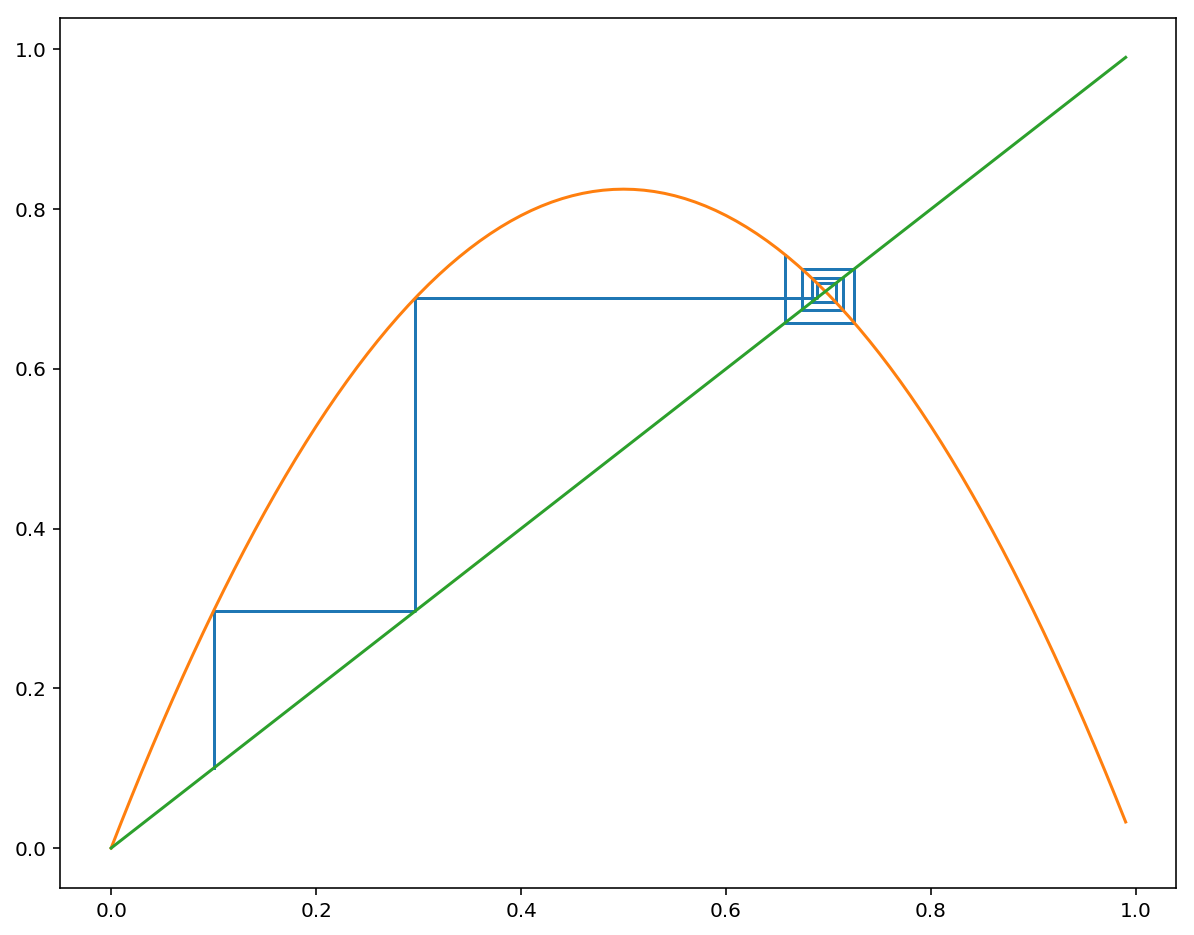

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(cobweb[:,0], cobweb[:,1])
ax.plot(plot[:,0], plot[:,1])
ax.plot(line[:,0], line[:,1])
plt.show()